In [1]:
from excel_reader import ExcelReader

In [2]:
from iv_calculator import calculate_iv_for_chain

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
excel_reader = ExcelReader(
    excel_file="petr_options_chain_4.xlsx",
    sheet_name="Sheet1",
    iv_col="I",
    start_row=2,
    end_row=1925,
    bid_col="E",
    ask_col="F",
    last_price_col="B",
    strike_col="C",
    open_interest_col="H",
    volume_col="D",
    ticker_col="A",
    maturity_col="G",
    spot_price_col="J"
)

In [6]:
with_forward = excel_reader.add_forward_price()

In [7]:
with_forward

,bid,ask,lastPrice,Strike,openInterest,volume,ticker,Expiry,IV,SpotPrice,Type,DaysToExpiry,TimeToExpiry,Forward
0,6.79,7.74,0.00,22.40,0.0,0.0,PETRJ224W4,24/10/2025,0.000000,29.68,call,3,0.011905,29.729424
1,6.71,6.92,6.68,22.90,100.0,100.0,PETRJ229W4,24/10/2025,0.000000,29.68,call,3,0.011905,29.729424
2,6.27,6.33,0.00,23.40,0.0,0.0,PETRJ234W4,24/10/2025,0.000000,29.68,call,3,0.011905,29.729424
3,5.77,5.83,0.00,23.90,0.0,0.0,PETRJ239W4,24/10/2025,0.000000,29.68,call,3,0.011905,29.729424
4,5.30,5.33,5.28,24.40,2300.0,200.0,PETRJ244W4,24/10/2025,0.078125,29.68,call,3,0.011905,29.729424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,0.00,0.00,2.73,37.50,1314400.0,166500.0,PETRP381,17/04/2026,0.000000,29.68,put,122,0.484127,31.757723
1920,0.00,0.00,4.87,37.75,26000.0,7000.0,PETRP383,17/04/2026,0.000000,29.68,put,122,0.484127,31.757723
1921,0.00,0.00,4.81,38.00,1000.0,10000.0,PETRP394,17/04/2026,0.000000,29.68,put,122,0.484127,31.757723
1922,0.00,0.00,6.00,38.25,86000.0,300.0,PETRP48,17/04/2026,0.000000,29.68,put,122,0.484127,31.757723


In [8]:
result = calculate_iv_for_chain(with_forward, 0.15, min_volume=100, max_rel_spread=5, min_days_expiry=2)

Price violation: Call price 6.8150 < Intrinsic 6.8181
Price violation: Call price 3.7950 < Intrinsic 3.7951
Price violation: Call price 7.7250 < Intrinsic 7.7295
Price violation: Call price 7.4800 < Intrinsic 7.4825
Price violation: Call price 7.2350 < Intrinsic 7.2355
Price violation: Call price 8.6750 < Intrinsic 8.6750


In [9]:
result

,TimeToExpiry,Strike,ImpliedVolatility,Type,Forward
11,0.011905,27.90,0.260495,call,29.729424
12,0.011905,28.40,0.257721,call,29.729424
13,0.011905,28.90,0.236199,call,29.729424
14,0.011905,29.40,0.213922,call,29.729424
15,0.011905,29.65,0.208111,call,29.729424
...,...,...,...,...,...
1879,0.484127,27.50,0.286510,put,31.757723
1880,0.484127,27.75,0.311629,put,31.757723
1881,0.484127,28.00,0.282257,put,31.757723
1882,0.484127,28.25,0.272874,put,31.757723


In [10]:
from data_formatter import format_options_data_to_dict
formatted_data = format_options_data_to_dict(result, strike_col='Strike', iv_col='ImpliedVolatility', tte_col='TimeToExpiry', forward_col='Forward')

In [11]:
formatted_data['call']

{0.011904761904761904:     Strike  ImpliedVolatility    Forward
 0    27.90           0.260495  29.729424
 1    28.40           0.257721  29.729424
 2    28.90           0.236199  29.729424
 3    29.40           0.213922  29.729424
 4    29.65           0.208111  29.729424
 5    29.90           0.205727  29.729424
 6    30.15           0.207146  29.729424
 7    30.40           0.209703  29.729424
 8    30.65           0.219904  29.729424
 9    30.90           0.215650  29.729424
 10   31.15           0.250832  29.729424
 11   31.40           0.265076  29.729424
 12   31.65           0.296541  29.729424
 13   31.90           0.327251  29.729424,
 0.031746031746031744:     Strike  ImpliedVolatility    Forward
 0     26.5           0.302470  29.811979
 1     27.0           0.290179  29.811979
 2     27.5           0.282881  29.811979
 3     28.0           0.256263  29.811979
 4     28.5           0.240328  29.811979
 5     29.0           0.222420  29.811979
 6     29.5           0.208375 

In [12]:
# formatted_data['call'][1/6] = formatted_data['call'][1/6].drop(index=0)

In [13]:
# formatted_data['call']

In [14]:
from svi import calibration_loop
svi_params_calibrated, optimization_results = calibration_loop(formatted_data['call'])


SVI calibration finished.
Starting SVI calibration for each expiration slice...
Calibrating for TTM = 3.0000 years...
  Using Vega weights - Min: 0.0120, Max: 0.1497
  Success: True, Params: [0.     0.0202 0.643  0.0415 0.0321]
Calibrating for TTM = 8.0000 years...
  Using Vega weights - Min: 0.0136, Max: 0.1551
  Success: True, Params: [0.     0.0218 0.0732 0.0208 0.0586]
Calibrating for TTM = 18.0000 years...
  Using Vega weights - Min: 0.1844, Max: 0.2122
  Success: True, Params: [4.100e-03 1.325e-01 3.956e-01 3.310e-02 1.000e-04]
Calibrating for TTM = 22.0000 years...
  Using Vega weights - Min: 0.0011, Max: 0.0387
  Success: True, Params: [ 0.0027  0.0326 -0.1629  0.0242  0.0681]
Calibrating for TTM = 27.0000 years...
  Using Vega weights - Min: 0.1018, Max: 0.1403
  Success: True, Params: [0.005  1.4249 0.999  0.1067 0.0117]
Calibrating for TTM = 42.0000 years...
  Using Vega weights - Min: 0.0002, Max: 0.0292
  Success: True, Params: [ 0.0068  0.0337 -0.2563  0.0362  0.0669]
Ca

c:\Users\pedro.hun\Documents\repos\medium_interpolation\vol_lib\svi.py:221: OptimizeWarning: Unknown solver options: ftol, gtol
  result = minimize(svi_objective,


  Success: True, Params: [0.00000e+00 2.14691e+01 9.99000e-01 3.17300e-01 1.80000e-02]
Skipping TTM=103.0000 due to insufficient data points (2).
Calibrating for TTM = 122.0000 years...
  Using Vega weights - Min: 0.1151, Max: 0.1388
  Success: True, Params: [0.0206 0.5097 0.3213 0.0971 0.002 ]


In [15]:
print(list(svi_params_calibrated.keys())*252)

[0.011904761904761904, 0.031746031746031744, 0.07142857142857142, 0.0873015873015873, 0.10714285714285714, 0.16666666666666666, 0.23809523809523808, 0.32936507936507936, 0.48412698412698413, 0.011904761904761904, 0.031746031746031744, 0.07142857142857142, 0.0873015873015873, 0.10714285714285714, 0.16666666666666666, 0.23809523809523808, 0.32936507936507936, 0.48412698412698413, 0.011904761904761904, 0.031746031746031744, 0.07142857142857142, 0.0873015873015873, 0.10714285714285714, 0.16666666666666666, 0.23809523809523808, 0.32936507936507936, 0.48412698412698413, 0.011904761904761904, 0.031746031746031744, 0.07142857142857142, 0.0873015873015873, 0.10714285714285714, 0.16666666666666666, 0.23809523809523808, 0.32936507936507936, 0.48412698412698413, 0.011904761904761904, 0.031746031746031744, 0.07142857142857142, 0.0873015873015873, 0.10714285714285714, 0.16666666666666666, 0.23809523809523808, 0.32936507936507936, 0.48412698412698413, 0.011904761904761904, 0.031746031746031744, 0.071

In [16]:
svi_params_calibrated

{0.011904761904761904: array([1.00124903e-06, 2.02440738e-02, 6.42961112e-01, 4.15272598e-02,
        3.20865062e-02]),
 0.031746031746031744: array([1.03941913e-06, 2.18444627e-02, 7.31749475e-02, 2.08289100e-02,
        5.85642873e-02]),
 0.07142857142857142: array([4.05560584e-03, 1.32464412e-01, 3.95581366e-01, 3.31263334e-02,
        1.00000000e-04]),
 0.0873015873015873: array([ 0.00269359,  0.03261341, -0.16287114,  0.02416551,  0.06814217]),
 0.10714285714285714: array([0.00496065, 1.42485553, 0.999     , 0.10672154, 0.01165962]),
 0.16666666666666666: array([ 0.00683119,  0.03366937, -0.2562726 ,  0.03618533,  0.06690748]),
 0.23809523809523808: array([ 1.00990444e-02,  1.94001623e-01, -1.90993529e-01,  5.00828265e-02,
         1.00000000e-04]),
 0.32936507936507936: array([1.00000000e-06, 2.14691111e+01, 9.99000000e-01, 3.17345301e-01,
        1.80176603e-02]),
 0.48412698412698413: array([0.02062332, 0.50971715, 0.32133088, 0.09709008, 0.00197853])}


Generating comparison plot for TTM = 0.0119...


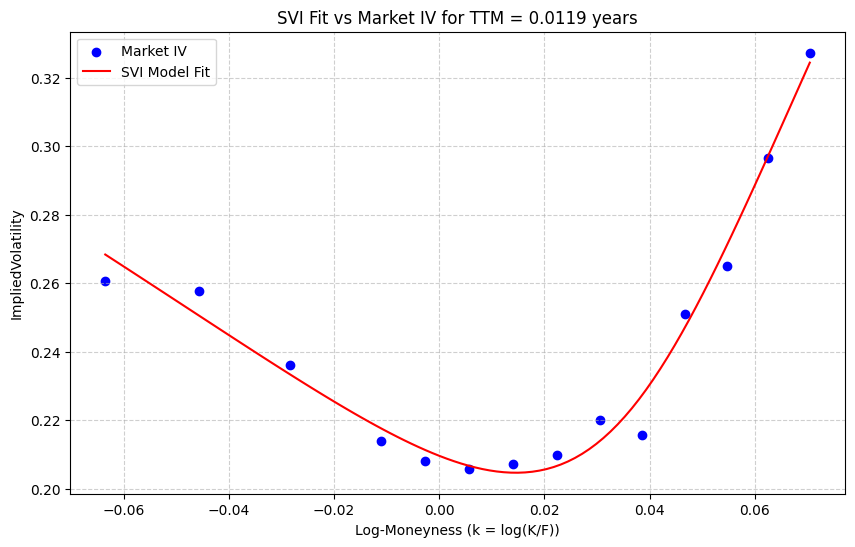


Generating comparison plot for TTM = 0.0317...


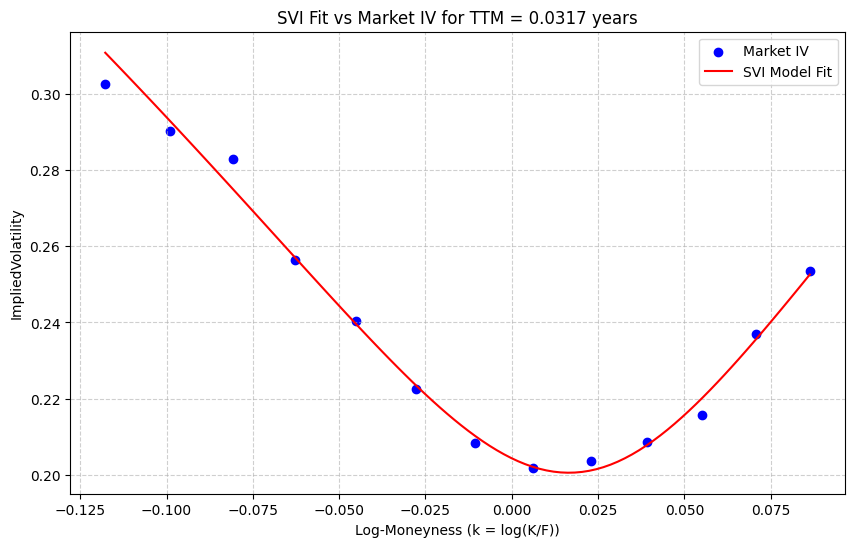


Generating comparison plot for TTM = 0.0714...


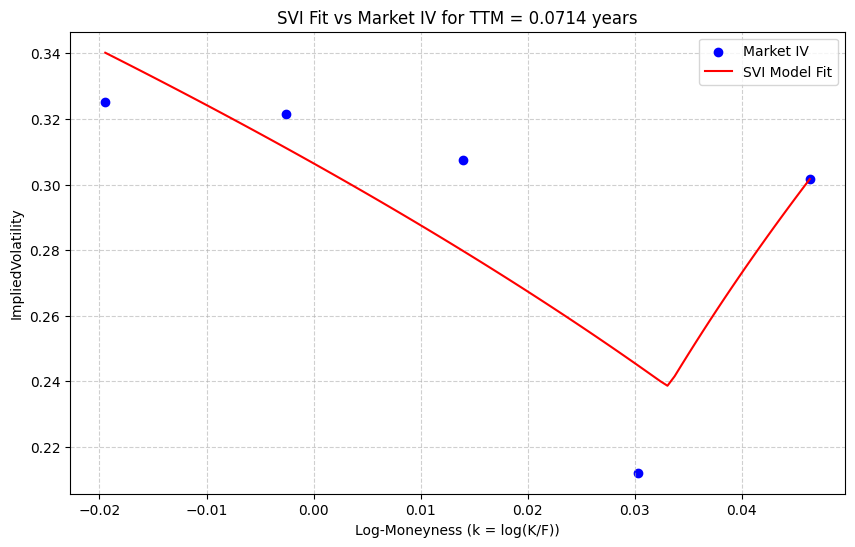


Generating comparison plot for TTM = 0.0873...


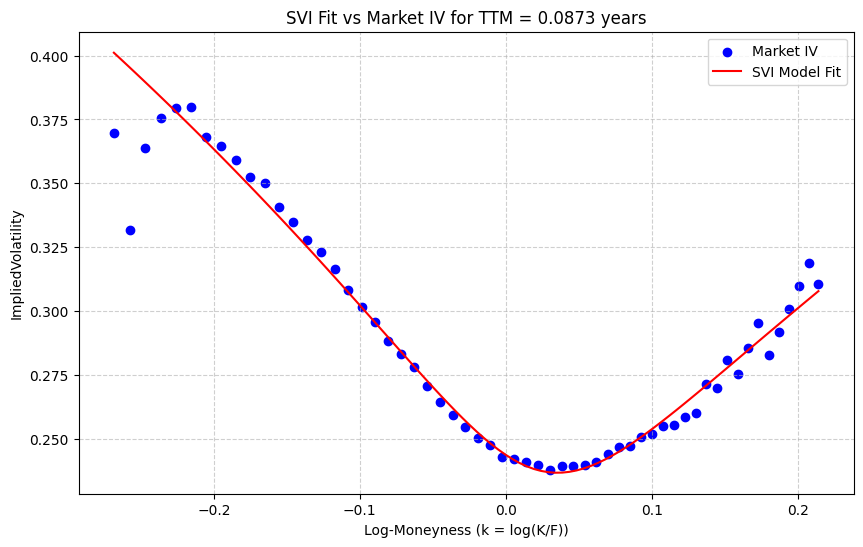


Generating comparison plot for TTM = 0.1071...


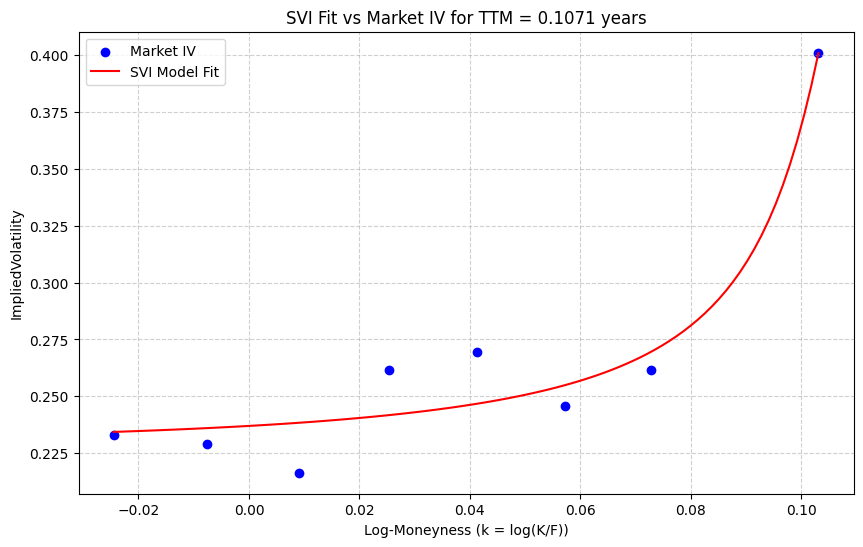


Generating comparison plot for TTM = 0.1667...


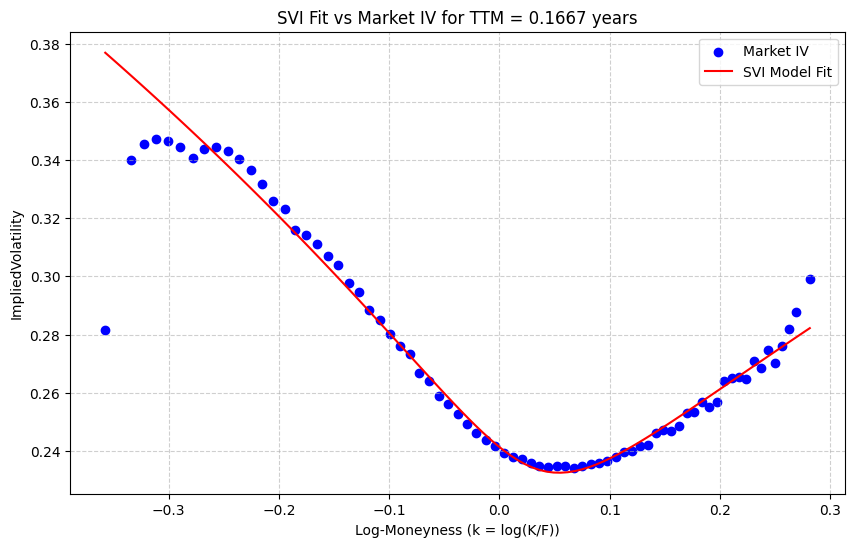


Generating comparison plot for TTM = 0.2381...


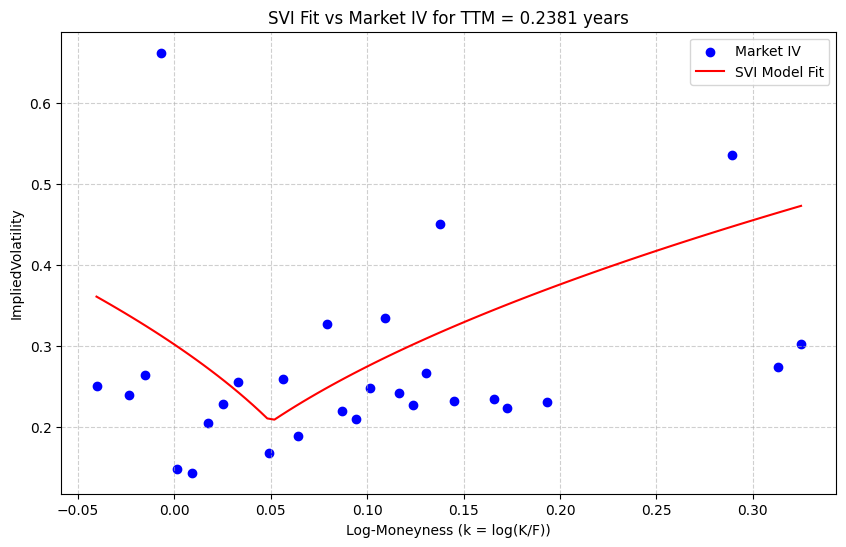


Generating comparison plot for TTM = 0.3294...


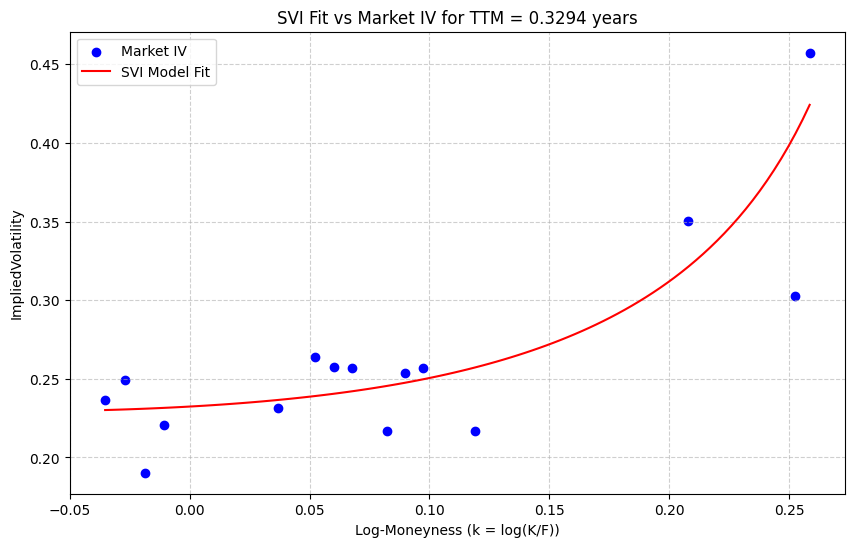


Generating comparison plot for TTM = 0.4841...


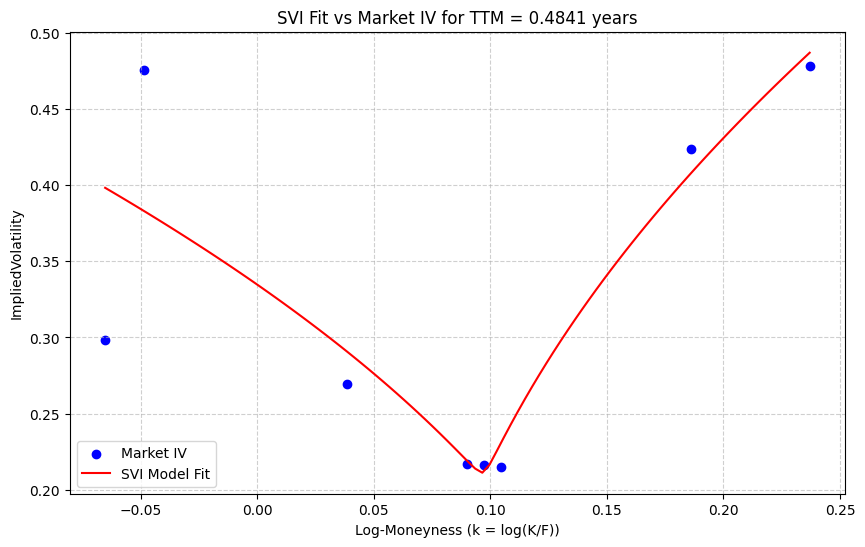

In [19]:
from svi import single_expiry_comparison_plot
expires = 9
i = 0
while i < expires:
    single_expiry_comparison_plot(formatted_data['call'], svi_params_calibrated, i)
    i += 1  

In [ ]:
from svi import calibration_loop
svi_params_calibrated, optimization_results = calibration_loop(formatted_data)

Starting SVI calibration for each expiration slice...


ValueError: Unknown format code 'f' for object of type 'str'

In [ ]:
# from cubic_interpolation import interpolate_volatility_surface, plot_interpolated_surface

In [ ]:
# TICKER_SYMBOL: str = "AAPL" # Default ticker, can be overridden by environment variable
# RISK_FREE_RATE: float = 0.15 # Example risk-free rate (annualized)
# # Filter thresholds for option data cleaning
# MIN_VOLUME: int = 100
# MAX_REL_SPREAD: float = 0.50 # Maximum relative spread (Spread / MidPrice)
# MIN_DAYS_TO_EXPIRY: int = 1 # Minimum days to expiry to include
# MIN_IV: float = 0.01 # Minimum plausible IV
# MAX_IV: float = 4.00 # Maximum plausible IV
# # Interpolation Grid Resolution
# N_STRIKES_GRID: int = 100
# N_EXPIRIES_GRID: int = 100
# INTERPOLATION_METHOD: str = 'cubic' # 'linear' or 'cubic'

In [ ]:
# print(f"\nInterpolating the volatility surface using '{INTERPOLATION_METHOD}' method...")
# T_grid, K_grid, iv_surface_interpolated = interpolate_volatility_surface(
#     iv_data=result,
#     method=INTERPOLATION_METHOD,
#     n_strikes=N_STRIKES_GRID,
#     n_expiries=N_EXPIRIES_GRID
# )

In [ ]:
# if T_grid.size > 0: # Check if interpolation produced a grid
#     print("Plotting the interpolated surface...")
#     plot_title = (f"{TICKER_SYMBOL} Implied Volatility Surface\n"
#                     f"({INTERPOLATION_METHOD.capitalize()} Interpolation, "
#                     f"{N_EXPIRIES_GRID}x{N_STRIKES_GRID} Grid)")
#     plot_interpolated_surface(
#         T_grid,
#         K_grid,
#         iv_surface_interpolated,
#         filename="plot.png",
#         title=plot_title
#     )
# else:
#     print("Interpolation failed or yielded no usable grid. Cannot plot surface.")
#     # Ensure plot file is created even if interpolation failed
#     plot_interpolated_surface(np.array([]), np.array([]), np.array([]), filename='plot.png', title=f"{TICKER_SYMBOL} IV Surface (Interpolation Failed)")

# print("\n--- Script execution finished ---")